In [ ]:
import pandas as pd
from matplotlib.collections import LineCollection
import matplotlib.cm
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import offsetbox
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import scipy as sp
import seaborn as sns
from sklearn.manifold import Isomap

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving distances.csv to distances.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data=pd.read_csv("distances.csv")
names=data['Unnamed: 0']
data = data.to_numpy()[:,1:].astype(np.float64)

In [ ]:
def rotate(a,angle):
  r = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)],
  ])
  return (r@a.T).T

In [ ]:
def MDS(data):
    n = len(data)
    squared=np.power(data, 2)
    identity = np.eye(n)
    e=np.ones(n)
    t_prod=np.outer(e,e.T)
    J=identity-(1/n)*t_prod
    mat = (-1/2) *(J@squared@J)
    eig1, eig2 = np.linalg.eig(mat)
    arr = eig1.argsort()[::-1]
    e = eig1[arr]
    q= eig2[:,arr]
    l=np.array([np.sqrt(max(e[0],0)),np.sqrt(max(e[1],0))])
    out =  q[:,:2]@np.diag(l)
    return out

In [ ]:
def isomap(data):
    n = np.shape(data)[0]
    Graph = nx.DiGraph()
    for i in range(n):
        for j in range(n):
            Graph.add_weighted_edges_from([(i,j,min(data[i,j], data[j,i]))])
    dij= dict(nx.all_pairs_dijkstra_path_length(Graph))
    D = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            D[i,j] = dij[i][j]
    Z=MDS(D)
    return Z,D

In [ ]:
X,_ = isomap(data)
X = rotate(X,np.pi)

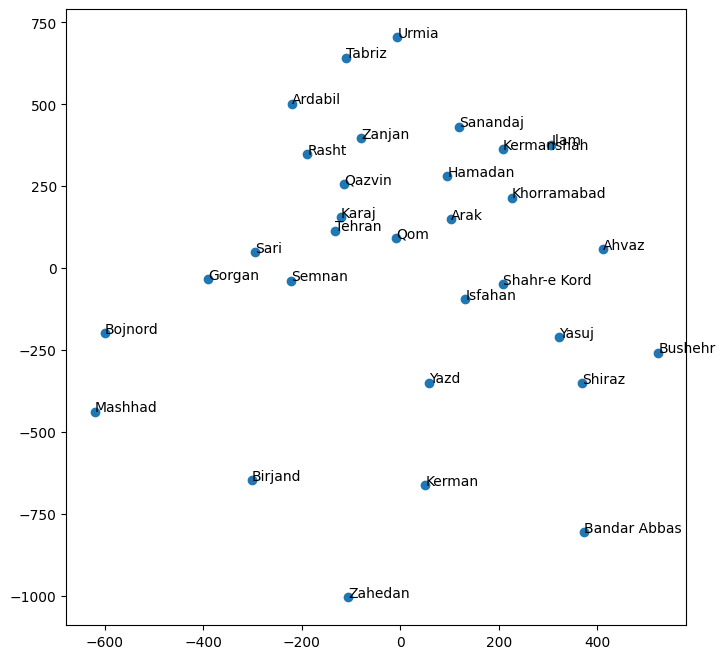

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
for i, name in enumerate(names):
    plt.annotate(name, (X[i, 0], X[i, 1]))
plt.show()

In [ ]:
iso=Isomap()
w=iso.fit_transform(data)
w = rotate(w, -np.pi/8)

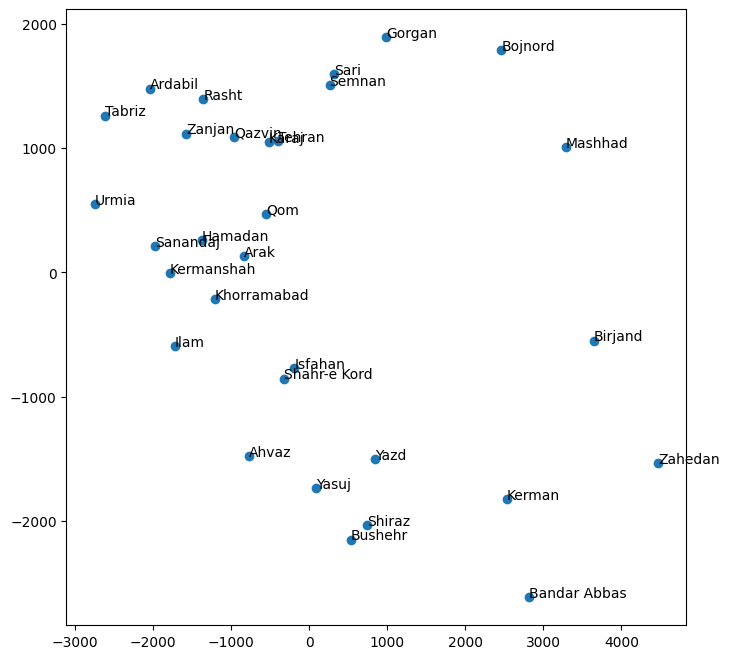

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(w[:, 0], w[:, 1])
for i, name in enumerate(names):
    plt.annotate(name, (w[i, 0], w[i, 1]))
plt.show()